In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train_scaled = x_train.astype('float32') / 255.
x_test_scaled = x_test.astype('float32') / 255.
x_train_scaled = np.reshape(x_train_scaled, (len(x_train_scaled), 28, 28, 1))
x_test_scaled = np.reshape(x_test_scaled, (len(x_test_scaled), 28, 28, 1))

In [ ]:
noise_factor = 0.5
x_train_noisy = x_train_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_scaled.shape) 
x_test_noisy = x_test_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_scaled.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

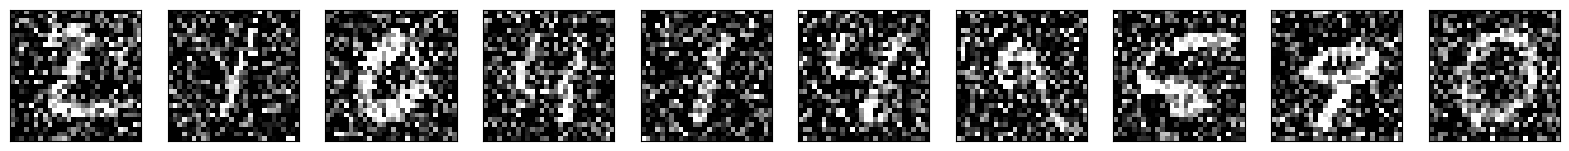

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_image = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3,3), activation = 'relu', padding= 'same') (input_image)
x = layers.MaxPooling2D((2,2) ,padding='same') (x)
x = layers.Conv2D(16, (3,3), activation ='relu' ,padding='same') (x)
x = layers.MaxPooling2D((2,2) ,padding='same') (x)
x = layers.Conv2D(8, (3,3), activation ='relu', padding= 'same') (x)
encoder_output = layers.MaxPooling2D((2,2), padding='same') (x)
x = layers. Conv2D(8, (3,3), activation = 'relu' , padding='same') (encoder_output)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(14, (3,3), activation ='relu' , padding='same') (x)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(16, (3,3), activation ='relu')(x)
x = layers.UpSampling2D((2,2))(x)
decoder_output = layers.Conv2D(1, (3,3), activation ='sigmoid' , padding= 'same') (x)
autoencoder = keras.Model(input_image, decoder_output)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_image,decoded)

In [ ]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           1160

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train_scaled,
                epochs=2,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_scaled))

Epoch 1/2
469/469 [==============================] - 17s 9ms/step - loss: 0.2382 - val_loss: 0.1813
Epoch 2/2
469/469 [==============================] - 3s 7ms/step - loss: 0.1696 - val_loss: 0.1596


In [ ]:
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 1s 3ms/step


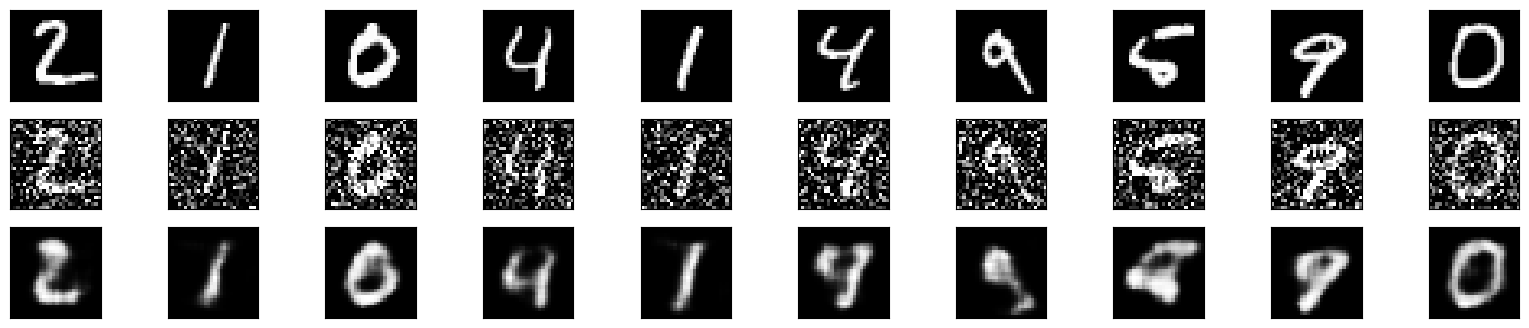

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test_scaled[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy
    ax = plt.subplot(3, n, i+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)    

    # Display reconstruction
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()